In [220]:
!pip install pymorphy3
import pandas as pd
import string
import re
import nltk
import pymorphy3

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [221]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\artembruh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [222]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\artembruh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [223]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\artembruh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [224]:
df = pd.read_csv("games.csv")

In [225]:
df.head()

Unnamed: 0                        title  \
0           0             Counter-Strike 2   
1           1  Clair Obscur: Expedition 33   
2           2          DOOM: The Dark Ages   
3           3               Cyberpunk 2077   
4           4              Baldur's Gate 3   

                                         description          date  \
0  Об этой игре Более двух десятилетий Counter-St...  21 Aug, 2012   
1  Об этой игре Раз в год Художница просыпается и...  24 Apr, 2025   
2  Об этой игре СТАНЬТЕ ПАЛАЧОМ В СРЕДНЕВЕКОВОЙ В...  14 May, 2025   
3  Об этой игре Cyberpunk 2077 — приключенческая ...   9 Dec, 2020   
4  Об этой игре Соберите отряд и вернитесь в Забы...   3 Aug, 2023   

                                                tags   rating  
0  Шутер от первого лица, Шутер, Для нескольких и...   9 / 10  
1  Пошаговые сражения, Глубокий сюжет, Фэнтези, И...   9 / 10  
2  Экшен, Шутер от первого лица, Демоны, Тёмное ф...   9 / 10  
3  Киберпанк, Открытый мир, Нагота, Ролевая игра,...   9 / 10  
4  Ролевая игра, Кастомизация персонажа, Решения ...  10 / 10

__title__ - название статьи/игры/файла

__description__ - описание статьи/игры/файла

__date_publish__ - дата выхода/публикации

__tags__ - тэги статьи/игры/файла

__rating__ - рейтинг статьи/игры/файла

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   50 non-null     int64 
 1   title        50 non-null     object
 2   description  50 non-null     object
 3   date         50 non-null     object
 4   tags         50 non-null     object
 5   rating       50 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.5+ KB


## 2. Предварительная обработка данных

1. Перевод всех букв в тексте в нижний регистр
2. Удаление знаков препинания
3. Токенизация по словам
4. Удаление стоп слов
5. Стемминг (приведение слов к нормальной форме)
6. Лемматизация

In [230]:
import re

def remove_english_words(text):
    # Удаляет слова, состоящие только из английских букв (включая сокращения)
    return re.sub(r'\b[a-zA-Z]+\b', '', text)

def remove_punctuation(text): 
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text): 
    return ''.join([i if not i.isdigit() else ' ' for i in text])

def remove_multiple_spaces(text): 
    return re.sub(r'\s+', ' ', text, flags=re.I)

st = '❯\xa0—«»'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [231]:
df['prep_text'] = [remove_english_words(remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(text.lower()))))) for text in df['description']]

In [232]:
df.head()

Unnamed: 0                        title  \
0           0             Counter-Strike 2   
1           1  Clair Obscur: Expedition 33   
2           2          DOOM: The Dark Ages   
3           3               Cyberpunk 2077   
4           4              Baldur's Gate 3   

                                         description          date  \
0  Об этой игре Более двух десятилетий Counter-St...  21 Aug, 2012   
1  Об этой игре Раз в год Художница просыпается и...  24 Apr, 2025   
2  Об этой игре СТАНЬТЕ ПАЛАЧОМ В СРЕДНЕВЕКОВОЙ В...  14 May, 2025   
3  Об этой игре Cyberpunk 2077 — приключенческая ...   9 Dec, 2020   
4  Об этой игре Соберите отряд и вернитесь в Забы...   3 Aug, 2023   

                                                tags   rating  \
0  Шутер от первого лица, Шутер, Для нескольких и...   9 / 10   
1  Пошаговые сражения, Глубокий сюжет, Фэнтези, И...   9 / 10   
2  Экшен, Шутер от первого лица, Демоны, Тёмное ф...   9 / 10   
3  Киберпанк, Открытый мир, Нагота, Ролевая игра,...   9 / 10   
4  Ролевая игра, Кастомизация персонажа, Решения ...  10 / 10   

                                           prep_text  
0  об этой игре более двух десятилетий   служит п...  
1  об этой игре раз в год художница просыпается и...  
2  об этой игре станьте палачом в средневековой в...  
3  об этой игре  приключенческая ролевая игра с о...  
4  об этой игре соберите отряд и вернитесь в забы...

In [233]:
df['description'][0]

'Об этой игре Более двух десятилетий Counter-Strike служит примером первоклассной соревновательной игры, путь развития которой определяют миллионы игроков со всего мира. Теперь пришло время нового этапа — Counter-Strike 2.Counter-Strike 2 — это бесплатное улучшение для CS:GO, которое знаменует собой крупнейший технологический скачок в истории серии. Оно разработано на движке Source 2 и модернизирует игру благодаря реалистичному и физически корректному рендерингу, организации сети по последнему слову технологий и улучшенным инструментам для мастерской сообщества.Кроме представленного в 1999 году классического игрового процесса, завязанного на достижении цели, Counter-Strike 2 включает:новые рейтинги CS и обновлённый премьер-режим;глобальные и региональные таблицы лидеров;улучшенные и воссозданные с нуля карты;принципиально новый динамический дым от гранат;игровой процесс, не зависящий от тикрейта;переосмысленные визуальные эффекты и звуки;все предметы инвентаря из CS:GO.'

In [234]:
df['prep_text'][0]

'об этой игре более двух десятилетий   служит примером первоклассной соревновательной игры путь развития которой определяют миллионы игроков со всего мира теперь пришло время нового этапа     это бесплатное улучшение для   которое знаменует собой крупнейший технологический скачок в истории серии оно разработано на движке  и модернизирует игру благодаря реалистичному и физически корректному рендерингу организации сети по последнему слову технологий и улучшенным инструментам для мастерской сообщества кроме представленного в году классического игрового процесса завязанного на достижении цели   включает новые рейтинги  и обновлённый премьер режим глобальные и региональные таблицы лидеров улучшенные и воссозданные с нуля карты принципиально новый динамический дым от гранат игровой процесс не зависящий от тикрейта переосмысленные визуальные эффекты и звуки все предметы инвентаря из   '

In [235]:
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['т.д.', 'т', 'д', 'это','который','с','своём','всем','наш', 'свой']) 
russian_stopwords 

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [236]:
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

In [237]:
df['tokenize_text'] = [tokenize(text) for text in df['prep_text']]

In [238]:
df.head()

Unnamed: 0                        title  \
0           0             Counter-Strike 2   
1           1  Clair Obscur: Expedition 33   
2           2          DOOM: The Dark Ages   
3           3               Cyberpunk 2077   
4           4              Baldur's Gate 3   

                                         description          date  \
0  Об этой игре Более двух десятилетий Counter-St...  21 Aug, 2012   
1  Об этой игре Раз в год Художница просыпается и...  24 Apr, 2025   
2  Об этой игре СТАНЬТЕ ПАЛАЧОМ В СРЕДНЕВЕКОВОЙ В...  14 May, 2025   
3  Об этой игре Cyberpunk 2077 — приключенческая ...   9 Dec, 2020   
4  Об этой игре Соберите отряд и вернитесь в Забы...   3 Aug, 2023   

                                                tags   rating  \
0  Шутер от первого лица, Шутер, Для нескольких и...   9 / 10   
1  Пошаговые сражения, Глубокий сюжет, Фэнтези, И...   9 / 10   
2  Экшен, Шутер от первого лица, Демоны, Тёмное ф...   9 / 10   
3  Киберпанк, Открытый мир, Нагота, Ролевая игра,...   9 / 10   
4  Ролевая игра, Кастомизация персонажа, Решения ...  10 / 10   

                                           prep_text  \
0  об этой игре более двух десятилетий   служит п...   
1  об этой игре раз в год художница просыпается и...   
2  об этой игре станьте палачом в средневековой в...   
3  об этой игре  приключенческая ролевая игра с о...   
4  об этой игре соберите отряд и вернитесь в забы...   

                                       tokenize_text  
0  игре двух десятилетий служит примером первокла...  
1  игре год художница просыпается рисует монолите...  
2  игре станьте палачом средневековой войне адомd...  
3  игре приключенческая ролевая игра открытым мир...  
4  игре соберите отряд вернитесь забытые королевс...

In [239]:
df['tokenize_text'][0]

'игре двух десятилетий служит примером первоклассной соревновательной игры путь развития которой определяют миллионы игроков мира пришло время нового этапа бесплатное улучшение которое знаменует собой крупнейший технологический скачок истории серии оно разработано движке модернизирует игру благодаря реалистичному физически корректному рендерингу организации сети последнему слову технологий улучшенным инструментам мастерской сообщества кроме представленного году классического игрового процесса завязанного достижении цели включает новые рейтинги обновлённый премьер режим глобальные региональные таблицы лидеров улучшенные воссозданные нуля карты принципиально новый динамический дым гранат игровой процесс зависящий тикрейта переосмысленные визуальные эффекты звуки предметы инвентаря'

In [240]:
stemmer = SnowballStemmer("russian")

stem_list = []
for text in (df['tokenize_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = stemmer.stem(word)
            res.append(p)
        text = " ".join(res)
        stem_list.append(text)
    except Exception as e:
        print(e)
        
df['text_stem'] = stem_list

In [241]:
df.head()

Unnamed: 0                        title  \
0           0             Counter-Strike 2   
1           1  Clair Obscur: Expedition 33   
2           2          DOOM: The Dark Ages   
3           3               Cyberpunk 2077   
4           4              Baldur's Gate 3   

                                         description          date  \
0  Об этой игре Более двух десятилетий Counter-St...  21 Aug, 2012   
1  Об этой игре Раз в год Художница просыпается и...  24 Apr, 2025   
2  Об этой игре СТАНЬТЕ ПАЛАЧОМ В СРЕДНЕВЕКОВОЙ В...  14 May, 2025   
3  Об этой игре Cyberpunk 2077 — приключенческая ...   9 Dec, 2020   
4  Об этой игре Соберите отряд и вернитесь в Забы...   3 Aug, 2023   

                                                tags   rating  \
0  Шутер от первого лица, Шутер, Для нескольких и...   9 / 10   
1  Пошаговые сражения, Глубокий сюжет, Фэнтези, И...   9 / 10   
2  Экшен, Шутер от первого лица, Демоны, Тёмное ф...   9 / 10   
3  Киберпанк, Открытый мир, Нагота, Ролевая игра,...   9 / 10   
4  Ролевая игра, Кастомизация персонажа, Решения ...  10 / 10   

                                           prep_text  \
0  об этой игре более двух десятилетий   служит п...   
1  об этой игре раз в год художница просыпается и...   
2  об этой игре станьте палачом в средневековой в...   
3  об этой игре  приключенческая ролевая игра с о...   
4  об этой игре соберите отряд и вернитесь в забы...   

                                       tokenize_text  \
0  игре двух десятилетий служит примером первокла...   
1  игре год художница просыпается рисует монолите...   
2  игре станьте палачом средневековой войне адомd...   
3  игре приключенческая ролевая игра открытым мир...   
4  игре соберите отряд вернитесь забытые королевс...   

                                           text_stem  
0  игр двух десятилет служ пример первоклассн сор...  
1  игр год художниц просыпа рис монол вывод сво п...  
2  игр станьт палач средневеков войн адомдо студ ...  
3  игр приключенческ ролев игр открыт мир рассказ...  
4  игр собер отряд верн забыт королевств ждет ист...

In [242]:
df['text_stem'][0]

'игр двух десятилет служ пример первоклассн соревновательн игр пут развит котор определя миллион игрок мир пришл врем нов этап бесплатн улучшен котор знамен соб крупн технологическ скачок истор сер он разработа движк модернизир игр благодар реалистичн физическ корректн рендеринг организац сет последн слов технолог улучшен инструмент мастерск сообществ кром представлен год классическ игров процесс завяза достижен цел включа нов рейтинг обновлен премьер реж глобальн региональн таблиц лидер улучшен воссозда нул карт принципиальн нов динамическ дым гранат игров процесс завися тикрейт переосмыслен визуальн эффект звук предмет инвентар'

In [243]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [244]:
%%time
lemm_texts_list = []
for text in (df['tokenize_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['text_lemm'] = lemm_texts_list

CPU times: total: 1.86 s
Wall time: 1.95 s


In [245]:
df.head()

Unnamed: 0                        title  \
0           0             Counter-Strike 2   
1           1  Clair Obscur: Expedition 33   
2           2          DOOM: The Dark Ages   
3           3               Cyberpunk 2077   
4           4              Baldur's Gate 3   

                                         description          date  \
0  Об этой игре Более двух десятилетий Counter-St...  21 Aug, 2012   
1  Об этой игре Раз в год Художница просыпается и...  24 Apr, 2025   
2  Об этой игре СТАНЬТЕ ПАЛАЧОМ В СРЕДНЕВЕКОВОЙ В...  14 May, 2025   
3  Об этой игре Cyberpunk 2077 — приключенческая ...   9 Dec, 2020   
4  Об этой игре Соберите отряд и вернитесь в Забы...   3 Aug, 2023   

                                                tags   rating  \
0  Шутер от первого лица, Шутер, Для нескольких и...   9 / 10   
1  Пошаговые сражения, Глубокий сюжет, Фэнтези, И...   9 / 10   
2  Экшен, Шутер от первого лица, Демоны, Тёмное ф...   9 / 10   
3  Киберпанк, Открытый мир, Нагота, Ролевая игра,...   9 / 10   
4  Ролевая игра, Кастомизация персонажа, Решения ...  10 / 10   

                                           prep_text  \
0  об этой игре более двух десятилетий   служит п...   
1  об этой игре раз в год художница просыпается и...   
2  об этой игре станьте палачом в средневековой в...   
3  об этой игре  приключенческая ролевая игра с о...   
4  об этой игре соберите отряд и вернитесь в забы...   

                                       tokenize_text  \
0  игре двух десятилетий служит примером первокла...   
1  игре год художница просыпается рисует монолите...   
2  игре станьте палачом средневековой войне адомd...   
3  игре приключенческая ролевая игра открытым мир...   
4  игре соберите отряд вернитесь забытые королевс...   

                                           text_stem  \
0  игр двух десятилет служ пример первоклассн сор...   
1  игр год художниц просыпа рис монол вывод сво п...   
2  игр станьт палач средневеков войн адомдо студ ...   
3  игр приключенческ ролев игр открыт мир рассказ...   
4  игр собер отряд верн забыт королевств ждет ист...   

                                           text_lemm  
0  игра два десятилетие служить пример первокласс...  
1  игра год художница просыпаться рисовать моноли...  
2  игра стать палач средневековый война адомdoom ...  
3  игра приключенческий ролевый игра открытый мир...  
4  игра собрать отряд вернуться забытый королевст...

In [246]:
df['text_lemm'][0]

'игра два десятилетие служить пример первоклассный соревновательный игра путь развитие который определять миллион игрок мир прийти время новый этап бесплатный улучшение который знаменовать себя крупный технологический скачок история серия оно разработать движок модернизировать игра благодаря реалистичный физически корректный рендеринг организация сеть последний слово технология улучшить инструмент мастерская сообщество кроме представить год классический игровой процесс завязать достижение цель включать новый рейтинг обновить премьер режим глобальный региональный таблица лидер улучшить воссоздать нуль карта принципиально новый динамический дым гранат игровой процесс зависеть тикрейт переосмыслить визуальный эффект звук предмет инвентарь'

In [247]:
df['text_lemm'] = [tokenize(text) for text in df['text_lemm']]

In [248]:
df.head()

Unnamed: 0                        title  \
0           0             Counter-Strike 2   
1           1  Clair Obscur: Expedition 33   
2           2          DOOM: The Dark Ages   
3           3               Cyberpunk 2077   
4           4              Baldur's Gate 3   

                                         description          date  \
0  Об этой игре Более двух десятилетий Counter-St...  21 Aug, 2012   
1  Об этой игре Раз в год Художница просыпается и...  24 Apr, 2025   
2  Об этой игре СТАНЬТЕ ПАЛАЧОМ В СРЕДНЕВЕКОВОЙ В...  14 May, 2025   
3  Об этой игре Cyberpunk 2077 — приключенческая ...   9 Dec, 2020   
4  Об этой игре Соберите отряд и вернитесь в Забы...   3 Aug, 2023   

                                                tags   rating  \
0  Шутер от первого лица, Шутер, Для нескольких и...   9 / 10   
1  Пошаговые сражения, Глубокий сюжет, Фэнтези, И...   9 / 10   
2  Экшен, Шутер от первого лица, Демоны, Тёмное ф...   9 / 10   
3  Киберпанк, Открытый мир, Нагота, Ролевая игра,...   9 / 10   
4  Ролевая игра, Кастомизация персонажа, Решения ...  10 / 10   

                                           prep_text  \
0  об этой игре более двух десятилетий   служит п...   
1  об этой игре раз в год художница просыпается и...   
2  об этой игре станьте палачом в средневековой в...   
3  об этой игре  приключенческая ролевая игра с о...   
4  об этой игре соберите отряд и вернитесь в забы...   

                                       tokenize_text  \
0  игре двух десятилетий служит примером первокла...   
1  игре год художница просыпается рисует монолите...   
2  игре станьте палачом средневековой войне адомd...   
3  игре приключенческая ролевая игра открытым мир...   
4  игре соберите отряд вернитесь забытые королевс...   

                                           text_stem  \
0  игр двух десятилет служ пример первоклассн сор...   
1  игр год художниц просыпа рис монол вывод сво п...   
2  игр станьт палач средневеков войн адомдо студ ...   
3  игр приключенческ ролев игр открыт мир рассказ...   
4  игр собер отряд верн забыт королевств ждет ист...   

                                           text_lemm  
0  игра десятилетие служить пример первоклассный ...  
1  игра год художница просыпаться рисовать моноли...  
2  игра стать палач средневековый война адомdoom ...  
3  игра приключенческий ролевый игра открытый мир...  
4  игра собрать отряд вернуться забытый королевст...

In [249]:
df.to_csv("games.csv", index=False)

# Облако слов

In [31]:
pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 220.2 kB/s eta 0:00:02
   ------ -------------------------------- 51.2/301.2 kB 262.6 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/301.2 kB 383.3 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/301.2 kB 409.6 kB/s eta 0:00:01
   --------------------------- ---------- 215.0/301.2 kB 691.9 kB/s eta 0:00:01
   ---------------------------------- --- 276.5/301.2 kB 776.2 kB/s eta 0:00:01
   -------------------------------------- 301.2/301.2 kB 775.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [32]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

<Axes: >

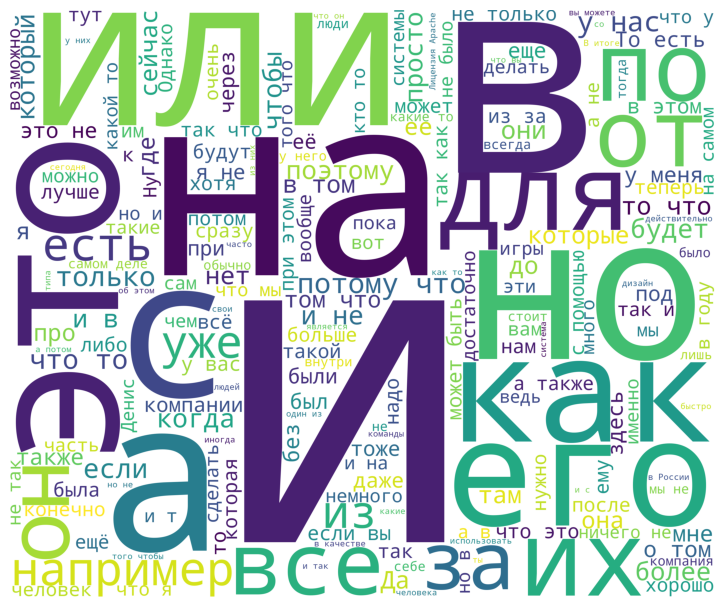

In [34]:
corpus = get_corpus(df['description'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

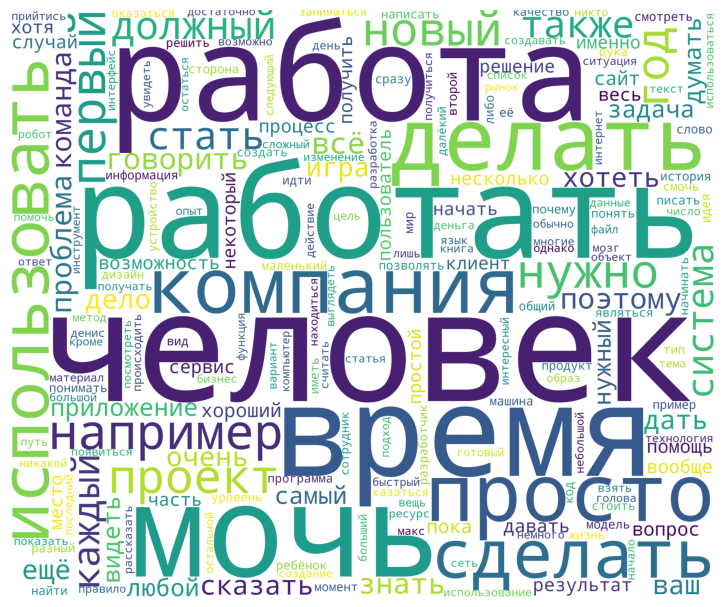

In [35]:
corpus = get_corpus(df['text_lemm'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [36]:
# Получение облака слов
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

<Axes: >

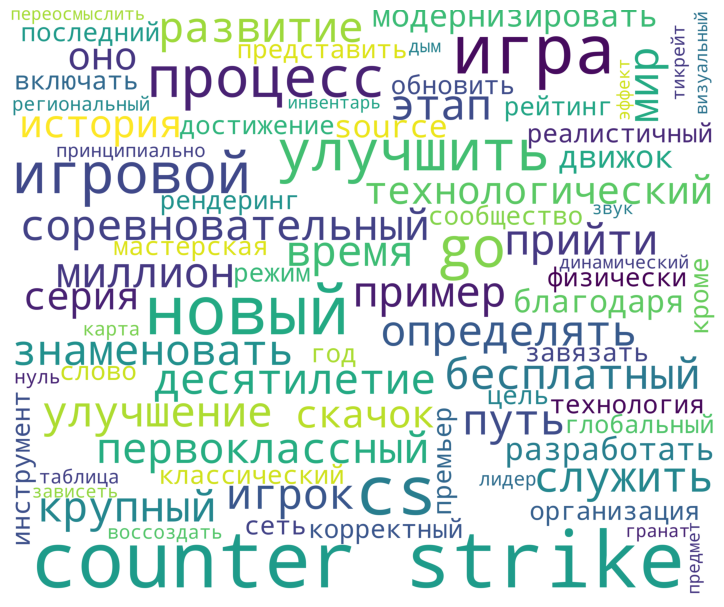

In [37]:
corpus = df['text_lemm'][0]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

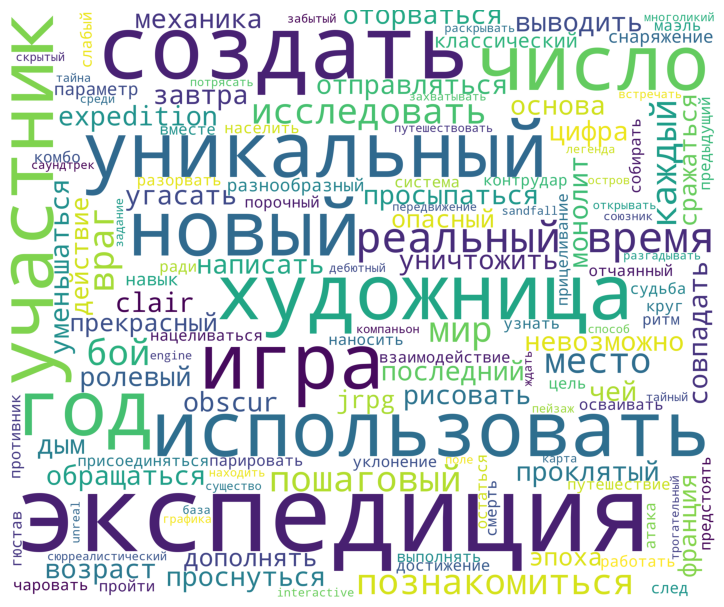

In [38]:
corpus = df['text_lemm'][1]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [39]:
df['text_lemm'][1]

'игра год художница просыпаться рисовать монолит выводить проклятый число каждый чей возраст совпадать число обращаться дым угасать каждый год число уменьшаться завтра проснуться написать цифра отправляться последний экспедиция уничтожить художница экспедиция clair obscur expedition новый пошаговый ролевый игра уникальный механика реальный время невозможно оторваться исследовать мир создать основа прекрасный эпоха франция сражаться опасный враг новый jrpg действие реальный время дополнять классический пошаговый бой создать уникальный экспедиция использовать разнообразный снаряжение навык параметр взаимодействие участник выполнять уклонение парировать наносить контрудар реальный время собирать комбо осваивать ритм атака нацеливаться слабый место противник использовать система прицеливание остаться год присоединяться гюстав маэль участник экспедиция отчаянный путешествие разорвать порочный круг смерть создать художница пройти след предыдущий экспедиция узнать судьба познакомиться участни

<Axes: >

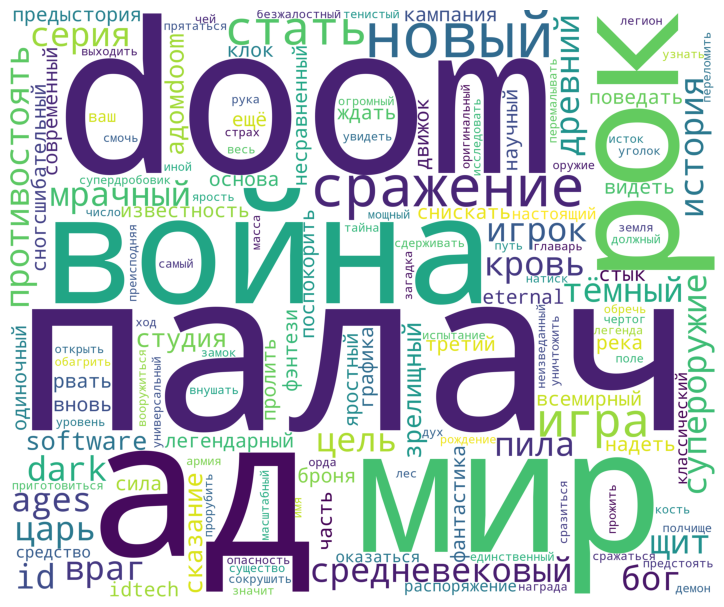

In [40]:
corpus = df['text_lemm'][2]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [41]:
df['text_lemm'][2]

'игра стать палач средневековый война адомdoom the dark ages студия id software зрелищный сказание легендарный палач рок поведать предыстория снискать всемирный известность игра doom doom eternal третий часть современный серия doom игрок вновь надеть броня палач рок пролить река кровь мрачный средневековый война сила ад ещё видеть doom the dark ages новый одиночный кампания несравненный серия doom стык научный фантастика тёмный фэнтези ждать яростный сражение сногсшибательный графика основа движок idtech поспокорить ад рвать враг клок настоящий супероружие бог царь цель ваш распоряжение оказаться классический средство супердробовик смочь перемалывать кость враг масса новый оружие число универсальный щит пила игрок противостоять орда демон приготовиться безжалостный сражение дух оригинальный doom выходить сражаться узнать исток ярость палач рок прожить история обречь супероружие рука бог царь палач предстоять сдерживать натиск легион ад противостоять главарь цель стать единственный суще

# Векторизация текстовых данных

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
df['text_lemm'][0]

'игра десятилетие counter strike служить пример первоклассный соревновательный игра путь развитие определять миллион игрок мир прийти время новый этап counter strike counter strike бесплатный улучшение cs go знаменовать крупный технологический скачок история серия оно разработать движок source модернизировать игра благодаря реалистичный физически корректный рендеринг организация сеть последний слово технология улучшить инструмент мастерская сообщество кроме представить год классический игровой процесс завязать достижение цель counter strike включать новый рейтинг cs обновить премьер режим глобальный региональный таблица лидер улучшить воссоздать нуль карта принципиально новый динамический дым гранат игровой процесс зависеть тикрейт переосмыслить визуальный эффект звук предмет инвентарь cs go'

In [45]:
vectorizer = CountVectorizer()
vectorizer.fit(df['text_lemm'])

CountVectorizer()

In [46]:
print(vectorizer.vocabulary_)

{'игра': 31162, 'десятилетие': 27108, 'counter': 3218, 'strike': 15146, 'служить': 57714, 'пример': 50923, 'первоклассный': 45989, 'соревновательный': 58448, 'путь': 52756, 'развитие': 53186, 'определять': 43953, 'миллион': 38227, 'игрок': 31183, 'мир': 38356, 'прийти': 50789, 'время': 23759, 'новый': 42257, 'этап': 67340, 'бесплатный': 20447, 'улучшение': 62693, 'cs': 3365, 'go': 6369, 'знаменовать': 30974, 'крупный': 35430, 'технологический': 60987, 'скачок': 57221, 'история': 32406, 'серия': 56772, 'оно': 43787, 'разработать': 53532, 'движок': 26587, 'source': 14761, 'модернизировать': 38656, 'благодаря': 20777, 'реалистичный': 54295, 'физически': 63773, 'корректный': 34842, 'рендеринг': 54704, 'организация': 44091, 'сеть': 56835, 'последний': 49461, 'слово': 57655, 'технология': 60990, 'улучшить': 62695, 'инструмент': 31928, 'мастерская': 37361, 'сообщество': 58363, 'кроме': 35357, 'представить': 50286, 'год': 25662, 'классический': 33577, 'игровой': 31177, 'процесс': 52409, 'завяз

In [47]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['text_lemm'])

In [48]:
count_matrix.shape

(870, 200841)

In [49]:
vectorizer.get_feature_names_out()[45000:46000]

array(['доверять полагаться знание', 'доверять разумеется',
       'доверять разумеется использовать', 'довесок', 'довести',
       'довести её', 'довести капитальный',
       'довести капитальный сооружение', 'довести конец',
       'довести проект', 'довести ум', 'довестись',
       'довестись присоединиться', 'довестись присоединиться команда',
       'довлеть', 'довлеть жёлтый', 'довлеть жёлтый красный', 'довод',
       'довод рассудок', 'довод рассудок почему', 'доводить',
       'доводить дело', 'доводить совершенство', 'доводить ум',
       'доводиться', 'доводка', 'довольно', 'довольно агент',
       'довольно агент личность', 'довольно безобидный',
       'довольно безобидный развлечение', 'довольно безразличный',
       'довольно болезненный', 'довольно больший', 'довольно большой',
       'довольно большой красный', 'довольно большой проблема',
       'довольно быстро', 'довольно быстро выясниться',
       'довольно быстро скопление', 'довольно быстрый', 'довольно важный',
 

In [50]:
vectorizer.get_feature_names_out()[3087]

'expansions'

In [51]:
vectorizer.get_feature_names_out()[25765]

'водянистый глаз'

In [52]:
print(count_matrix)

  (0, 58798)	3
  (0, 43372)	1
  (0, 1935)	4
  (0, 9157)	4
  (0, 164194)	1
  (0, 134575)	1
  (0, 113704)	1
  (0, 168643)	1
  (0, 143189)	1
  (0, 146181)	1
  (0, 105964)	1
  (0, 84224)	1
  (0, 59174)	1
  (0, 84717)	1
  (0, 133649)	1
  (0, 28542)	1
  (0, 98589)	3
  (0, 199631)	1
  (0, 15451)	1
  (0, 185116)	1
  (0, 2015)	3
  (0, 3801)	2
  (0, 74929)	1
  (0, 179979)	1
  (0, 161907)	1
  :	:
  (869, 21718)	1
  (869, 189854)	2
  (869, 113321)	1
  (869, 123400)	1
  (869, 36184)	1
  (869, 46613)	2
  (869, 46626)	1
  (869, 46628)	1
  (869, 61552)	1
  (869, 187644)	1
  (869, 115812)	1
  (869, 104988)	1
  (869, 123401)	1
  (869, 36185)	1
  (869, 189908)	1
  (869, 7221)	1
  (869, 138671)	1
  (869, 37680)	1
  (869, 167481)	1
  (869, 189880)	1
  (869, 38160)	3
  (869, 153151)	1
  (869, 168394)	1
  (869, 8267)	1
  (869, 8268)	1


3. TF-IDF

__TF-IDF__ - это способ векторизации текста, отражающий важность слова в документе, а не только частоту его появления. В тексте большого объема некоторые слова могут присутствовать очень часто, но при этом не нести никакой значимой информации о фактическом содержании текста (документа). Если такие данные передавать непосредственно классификатору, то такие частые термины могут затенять частоты более редких, но при этом более интересных терминов. Для того, чтобы этого избежать, достаточно разделить количество употреблений каждого слова в документе на общее количество слов в документе, это есть TF — частота термина. Термин IDF (inverse document frequency) обозначает обратную частоту термина (инверсия частоты) с которой некоторое слово встречается в документах. IDF позволяет измерить непосредственную важность термина.


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [57]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_lemm'])

CPU times: total: 18.1 s
Wall time: 18.3 s


In [58]:
tfidf_matrix.shape

(870, 10000)

In [59]:
tfidf_vectorizer.get_feature_names_out()[:100]

array(['about', 'academy', 'access', 'accessibility', 'action', 'active',
       'add', 'address', 'adobe', 'advanced', 'after', 'agency', 'agile',
       'ai', 'aic', 'air', 'airbnb', 'aka', 'all', 'alpha', 'am',
       'amazon', 'an', 'analysis', 'analytics', 'and', 'and the',
       'android', 'android ios', 'android разработка',
       'android разработчик', 'any', 'apache', 'api', 'app', 'apple',
       'application', 'applications', 'apps', 'ar', 'architecture',
       'arduino', 'are', 'args', 'arm', 'art', 'artlebedev',
       'artlebedev ru', 'as', 'async', 'at', 'audio', 'auto', 'avito',
       'awards', 'aws', 'azure', 'back', 'backend', 'background', 'badoo',
       'base', 'based', 'bash', 'be', 'before', 'begin', 'best', 'beyond',
       'big', 'big data', 'bin', 'bit', 'black', 'block', 'blog', 'blue',
       'bluetooth', 'body', 'bookmate', 'bootstrap', 'box', 'brain',
       'brand', 'break', 'buffer', 'build', 'building', 'business', 'but',
       'by', 'ca', 'cache',

In [60]:
tfidf_vectorizer.get_feature_names_out()[1253]

'больший данные'

In [62]:
tfidf_vectorizer.get_feature_names_out()[5866]

'пережить'

In [64]:
print(tfidf_matrix)

  (0, 6879)	0.12502923499822657
  (0, 2621)	0.11591298153980764
  (0, 3172)	0.24008247608779482
  (0, 6827)	0.10837817256973516
  (0, 7259)	0.12159160854909963
  (0, 6660)	0.06725861895124567
  (0, 3084)	0.07776154616428349
  (0, 9943)	0.06627797645817053
  (0, 1539)	0.08049430820241098
  (0, 5894)	0.11858488881406479
  (0, 2816)	0.05686018257364339
  (0, 2672)	0.1123912134803449
  (0, 2459)	0.0908204966903941
  (0, 6878)	0.09629241457379578
  (0, 3522)	0.060599349448878535
  (0, 5033)	0.07287060956499031
  (0, 1725)	0.11858488881406479
  (0, 4024)	0.07577919269646449
  (0, 8792)	0.07674992700000295
  (0, 7584)	0.09629241457379578
  (0, 2121)	0.0739480280384654
  (0, 7608)	0.05751837183341123
  (0, 5089)	0.07992231915162712
  (0, 7628)	0.08049430820241098
  (0, 1568)	0.06355554885994912
  :	:
  (869, 3951)	0.08020086300968568
  (869, 7029)	0.051961653433471484
  (869, 3697)	0.04712875201916417
  (869, 1460)	0.0770373629602805
  (869, 6000)	0.08446388368961098
  (869, 3199)	0.0720301306